# <center> <img src="../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> **Big Data** </center>
---
### <center> **Autumn 2025** </center>
---
### <center> **Examples on Structured Streaming (Kafka)** </center>
---
**Profesor**: Pablo Camarillo Ramirez

# Install Kafka SERVER

Go to `kafka` folder and run:

`docker compose up -d`

# Create SparkSession
## Install Kafka connector

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on Structured Streaming (Kafka)") \
    .master("spark://spark-master:7077") \
    .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.13:4.0.0") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("INFO")

# Optimization (reduce the number of shuffle partitions)
spark.conf.set("spark.sql.shuffle.partitions", "5")

:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.3.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /root/.ivy2.5.2/cache
The jars for the packages stored in: /root/.ivy2.5.2/jars
org.apache.spark#spark-sql-kafka-0-10_2.13 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-64402cd5-f977-45e7-b346-8a2cc2406cd2;1.0
	confs: [default]
	found org.apache.spark#spark-sql-kafka-0-10_2.13;4.0.0 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.13;4.0.0 in central
	found org.apache.kafka#kafka-clients;3.9.0 in central
	found org.lz4#lz4-java;1.8.0 in central
	found org.xerial.snappy#snappy-java;1.1.10.7 in central
	found org.slf4j#slf4j-api;2.0.16 in central
	found org.apache.hadoop#hadoop-client-runtime;3.4.1 in central
	found org.apache.hadoop#hadoop-client-api;3.4.1 in central
	found com.google.code.findbugs#jsr305;3.0.0 in central
	found org.scala-lang.modules#scala-parallel-collections_2.13;1.2.0

# Create a data stream from a Kafka topic

In [2]:
# Create the remote connection
kafka_df = spark.readStream \
            .format("kafka") \
            .option("kafka.bootstrap.servers", "kafka:9093") \
            .option("subscribe", "topic-pablo-1") \
            .load()

kafka_df.printSchema()


# Transform binary data to string
df_input = kafka_df.selectExpr("CAST(value AS STRING)")

# Send transformed data to the Sink
query_a = df_input.writeStream \
            .trigger(processingTime='1 second') \
            .outputMode("append") \
            .format("console") \
            .start()

root
 |-- key: binary (nullable = true)
 |-- value: binary (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



25/10/10 14:06:29 WARN ResolveWriteToStream: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-1f26b667-f4f5-45a8-b8ec-05389ab2f5f1. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.
25/10/10 14:06:29 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.


-------------------------------------------
Batch: 0
-------------------------------------------
+-----+
|value|
+-----+
+-----+



25/10/10 14:06:31 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 1000} milliseconds, but spent 1688 milliseconds
25/10/10 14:07:27 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 1000} milliseconds, but spent 1818 milliseconds


-------------------------------------------
Batch: 1
-------------------------------------------
+--------------------+
|               value|
+--------------------+
|hola clase ya es ...|
+--------------------+



In [3]:
query_a.stop()
sc.stop()

25/10/10 14:11:29 WARN DAGScheduler: Failed to cancel job group bca2c801-355a-479d-9363-136c42018cc0. Cannot find active jobs for it.
25/10/10 14:11:29 WARN DAGScheduler: Failed to cancel job group bca2c801-355a-479d-9363-136c42018cc0. Cannot find active jobs for it.


## Add a Streaming listener

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pcamarillor.streaming_listener import MyListener

spark = SparkSession.builder \
    .appName("Examples on Structured Streaming (Kafka)") \
    .master("spark://spark-master:7077") \
    .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.13:4.0.0") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext

# Optimization (reduce the number of shuffle partitions)
spark.conf.set("spark.sql.shuffle.partitions", "5")

# Add custom listener
spark.streams.addListener(MyListener())

:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.3.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /root/.ivy2.5.2/cache
The jars for the packages stored in: /root/.ivy2.5.2/jars
org.apache.spark#spark-sql-kafka-0-10_2.13 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-77f1a599-c85e-4312-a13b-014870192d14;1.0
	confs: [default]
	found org.apache.spark#spark-sql-kafka-0-10_2.13;4.0.0 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.13;4.0.0 in central
	found org.apache.kafka#kafka-clients;3.9.0 in central
	found org.lz4#lz4-java;1.8.0 in central
	found org.xerial.snappy#snappy-java;1.1.10.7 in central
	found org.slf4j#slf4j-api;2.0.16 in central
	found org.apache.hadoop#hadoop-client-runtime;3.4.1 in central
	found org.apache.hadoop#hadoop-client-api;3.4.1 in central
	found com.google.code.findbugs#jsr305;3.0.0 in central
	found org.scala-lang.modules#scala-parallel-collections_2.13;1.2.0

Query started: c06300ce-3939-4fa9-a157-9294e3728778
Query made progress: {
  "id" : "c06300ce-3939-4fa9-a157-9294e3728778",
  "runId" : "965be180-a10f-4a2d-8cbe-e865821a60c0",
  "name" : null,
  "timestamp" : "2025-10-10T14:29:31.418Z",
  "batchId" : 0,
  "batchDuration" : 3231,
  "numInputRows" : 0,
  "inputRowsPerSecond" : 0.0,
  "processedRowsPerSecond" : 0.0,
  "durationMs" : {
    "addBatch" : 2144,
    "commitOffsets" : 93,
    "getBatch" : 24,
    "latestOffset" : 463,
    "queryPlanning" : 469,
    "triggerExecution" : 3229,
    "walCommit" : 26
  },
  "stateOperators" : [ {
    "operatorName" : "stateStoreSave",
    "numRowsTotal" : 0,
    "numRowsUpdated" : 0,
    "allUpdatesTimeMs" : 25,
    "numRowsRemoved" : 0,
    "allRemovalsTimeMs" : 0,
    "commitTimeMs" : 100,
    "memoryUsedBytes" : 1200,
    "numRowsDroppedByWatermark" : 0,
    "numShufflePartitions" : 5,
    "numStateStoreInstances" : 5,
    "customMetrics" : {
      "loadedMapCacheHitCount" : 0,
      "loadedMapCa

In [3]:
# Create the remote connection
kafka_df = spark.readStream \
            .format("kafka") \
            .option("kafka.bootstrap.servers", "kafka:9093") \
            .option("subscribe", "topic-pablo-1") \
            .load()


# Transform binary data to string
df_input = kafka_df.selectExpr("CAST(value AS STRING)")

from pyspark.sql.functions import explode, split

df_input = df_input.select(explode(split(df_input.value, " ")).alias("word"))
df_input = df_input.groupBy("word").count()

# Send transformed data to the Sink
query_b = df_input.writeStream \
            .trigger(processingTime='2 seconds') \
            .outputMode("complete") \
            .format("console") \
            .start()


query_b.awaitTermination(60)

25/10/10 14:30:40 WARN ResolveWriteToStream: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-ac06652b-a588-48a1-ba5d-38e6e80884b2. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.
25/10/10 14:30:40 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.


-------------------------------------------
Batch: 0
-------------------------------------------
+----+-----+
|word|count|
+----+-----+
+----+-----+



25/10/10 14:30:56 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 2000} milliseconds, but spent 2105 milliseconds


-------------------------------------------
Batch: 1
-------------------------------------------
+-----+-----+
| word|count|
+-----+-----+
|spark|    1|
|   de|    1|
|nuevo|    1|
| hola|    1|
+-----+-----+



False

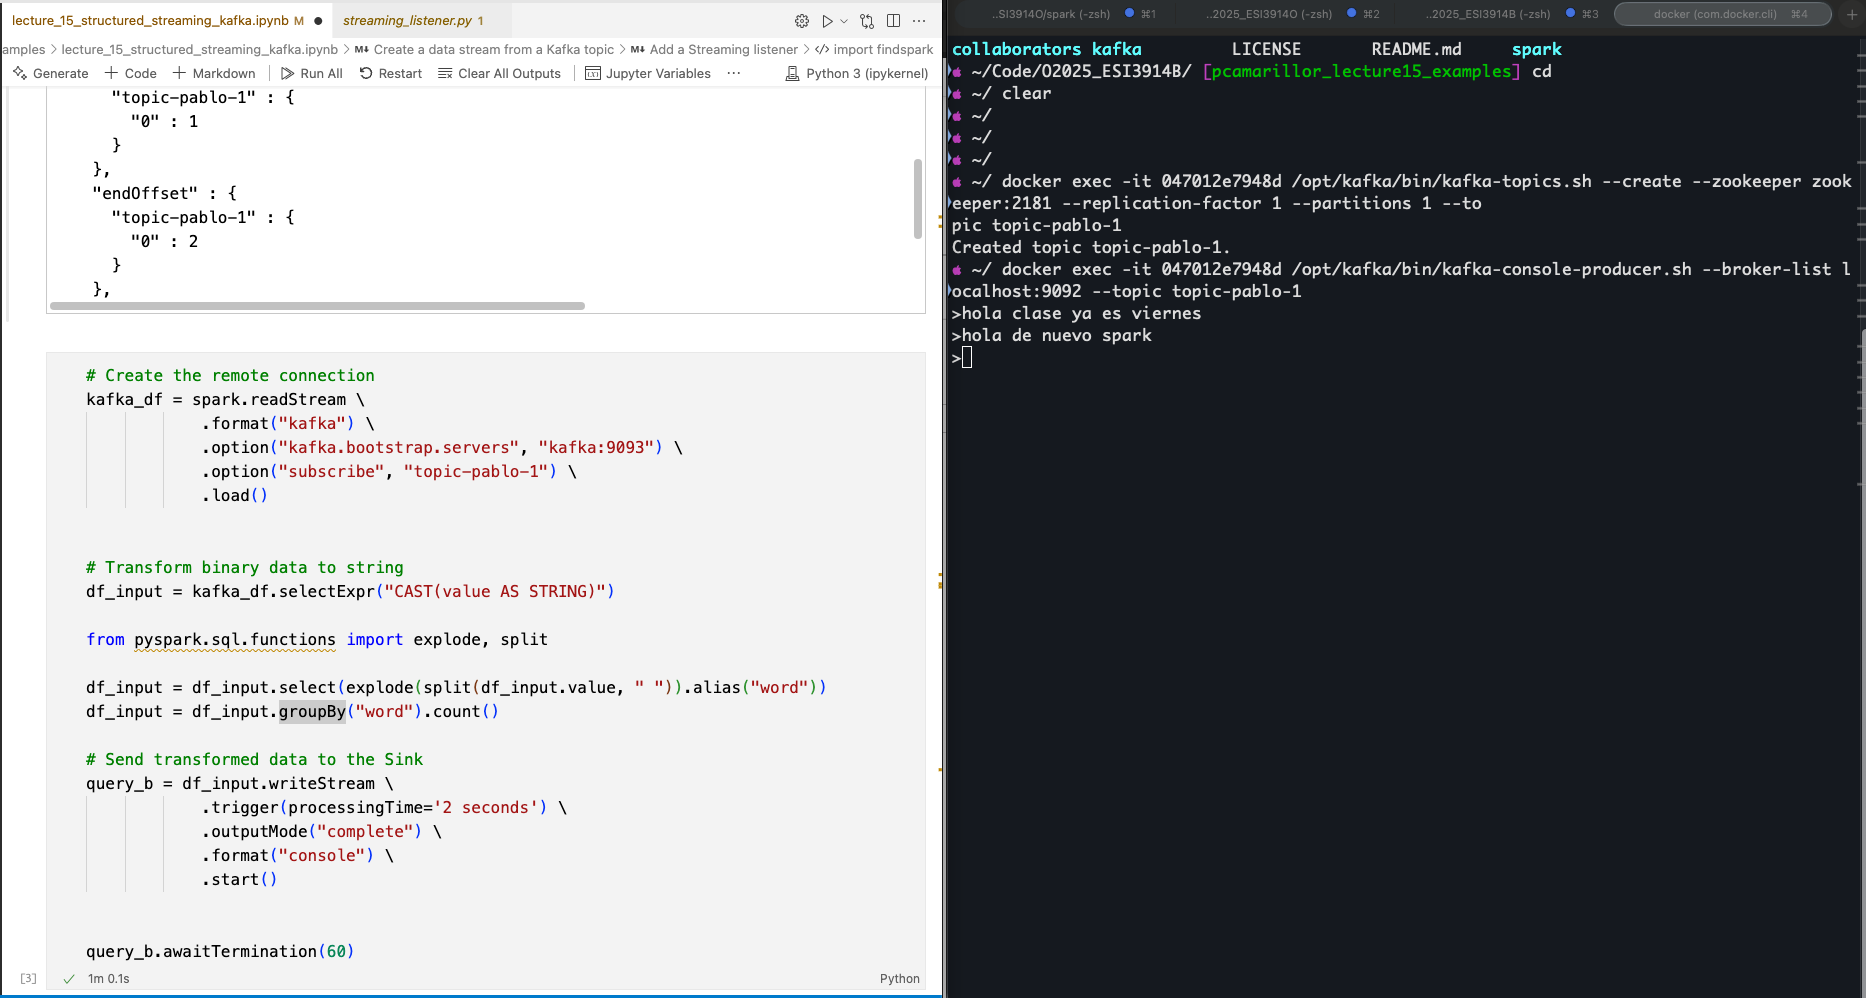

In [ ]:
query_b.stop()
sc.stop()